# Data Management

Building a dataframe from which to sample datasets and assign labels. Can point to files and pass to featurizing pipeline.

In [17]:
import numpy as np
import pandas as pd
import librosa as lr
import glob
import matplotlib.pyplot as plt
import os

from IPython.display import Audio

In [43]:
#load existing datasets into separate dataframes

RIR_PATH = "/scratch/ci411/sonos_rirs/rirs"

ACE_PATH = os.path.join(RIR_PATH,'ace', 'Single/')

AIR_PATH = os.path.join(RIR_PATH,'air', 'wav')

OPENAIR_PATH = os.path.join(RIR_PATH,'openair')

## ACE

ACE contains subfolders with different rooms with several different samples.

We only care about the RIRs so we'll map the file with the room in the database entries

In [19]:
files = glob.glob(ACE_PATH+"**/**/*RIR.wav")
ace_pairs = []
ace_labels = []
for file in files:
    room = "ace_" + file.split('/')[7]
    ace_pairs.append((file, room))
    ace_labels.append(room)
ace_labels = list(set(ace_labels))

In [30]:
len(ace_pairs)

14

In [21]:
# in m^3, pulled from Eaton et al.
ace_vol_dict = {'ace_Office_1' : 47.3, 
                'ace_Lecture_Room_1' : 202,
                'ace_Meeting_Room_1' : 99.6,
                'ace_Office_2' : 48.3,
                'ace_Meeting_Room_2' : 246,
                'ace_Lecture_Room_2' : 370,
                'ace_Building_Lobby' : 72.9}


In [27]:
air_labels = ["air_booth","air_lecture", "air_meeting", "air_office"]
air_pairs = []
for key in air_labels:
    search = AIR_PATH+"/*{}*.wav".format(key)
    files = glob.glob(search)
    for file in np.sort(files):
        air_pairs.append((file, key))
        

In [29]:
len(air_pairs)

68

In [31]:
#in m^3, from Jeub et al.

air_vol_dict = {'air_booth' : 3.00 * 1.80 * 2.20,
                'air_lecture' : 10.80 * 10.90 * 3.15,
                'air_meeting' : 8.00 * 5.00 * 3.10,
                'air_office' : 5.00 * 6.40 * 2.90}

In [32]:
ace_df = pd.DataFrame(ace_pairs, columns=['file','room'])
ace_df['dataset'] = "ace"
ace_df['vol'] = ace_df['room'].apply(lambda x : ace_vol_dict[x])

air_df = pd.DataFrame(air_pairs, columns=['file','room'])
air_df['dataset'] = "air"
air_df['vol'] = air_df['room'].apply(lambda x : air_vol_dict[x])

In [33]:
ace_df.to_csv(os.path.join(ACE_PATH, 'ace_df.csv'))
air_df.to_csv(os.path.join(AIR_PATH, 'air_df.csv'))


In [39]:
pra_df = pd.read_csv(os.path.join(RIR_PATH, 'pra', '0721_pra_df.csv'), index_col=0)

In [40]:
rir_df = pd.concat([ace_df,air_df,pra_df])
rir_df

,file,room,dataset,vol
0,/scratch/ci411/sonos_rirs/rirs/ace/Single/Buil...,ace_Building_Lobby,ace,72.900000
1,/scratch/ci411/sonos_rirs/rirs/ace/Single/Buil...,ace_Building_Lobby,ace,72.900000
2,/scratch/ci411/sonos_rirs/rirs/ace/Single/Offi...,ace_Office_1,ace,47.300000
3,/scratch/ci411/sonos_rirs/rirs/ace/Single/Offi...,ace_Office_1,ace,47.300000
4,/scratch/ci411/sonos_rirs/rirs/ace/Single/Meet...,ace_Meeting_Room_2,ace,246.000000
...,...,...,...,...
45,/scratch/ci411/sonos_rirs/pra/0721_pra/0721_pr...,0721_pra_room45,0721_pra,215.975300
46,/scratch/ci411/sonos_rirs/pra/0721_pra/0721_pr...,0721_pra_room46,0721_pra,149.724699
47,/scratch/ci411/sonos_rirs/pra/0721_pra/0721_pr...,0721_pra_room47,0721_pra,188.089546
48,/scratch/ci411/sonos_rirs/pra/0721_pra/0721_pr...,0721_pra_room48,0721_pra,134.675793


In [41]:
rir_df.to_csv('/home/ci411/volume_estimation/0721_rir_df.csv')

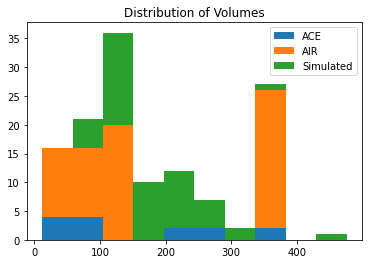

In [42]:
plt.title("Distribution of Volumes")
plt.hist([ace_df['vol'], air_df['vol'], pra_df['vol']], stacked=True, label=['ACE','AIR', 'Simulated'],bins=10)
plt.legend()

In [73]:
openair_rooms = os.listdir(OPENAIR_PATH)
openair_rooms = np.sort(openair_rooms)[1:] #removes .DS_Store

In [74]:
#from csv of volumes

vols = [
21000,
1560,
8000,
908.23,
2300,
35.2,
9000,
2000,
13000,
100,
3500,
18000,
2398.8,
9000,
6000,
2600,
3600,
8000,
4500,
3500,
40,
15700,
1140]

In [75]:
openair_tuples = []
for i, room in enumerate(openair_rooms):
    #vol_dict[room] = vols[i]
    room_audio_search = os.path.join(OPENAIR_PATH, room, 'b-format','*.wav')
    files = glob.glob(room_audio_search)
    for file in files:
        openair_tuples.append((file, room, 'openair', vols[i]))

In [76]:
openair_df = pd.DataFrame(openair_tuples, columns=['file', 'room', 'dataset', 'vol'])
openair_df

,file,room,dataset,vol
0,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
1,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
2,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
3,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
4,/scratch/ci411/sonos_rirs/rirs/openair/alcuin-...,alcuin-college-university-york,openair,21000.0
...,...,...,...,...
199,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
200,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
201,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0
202,/scratch/ci411/sonos_rirs/rirs/openair/york-gu...,york-guildhall-council-chamber,openair,1140.0


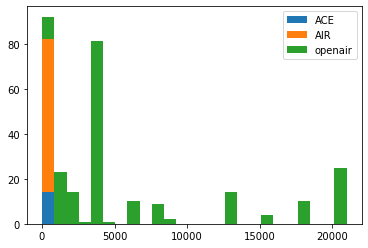

In [80]:
plt.hist([ace_df['vol'], air_df['vol'], openair_df['vol']], stacked=True, label=['ACE','AIR', 'openair'],bins=25)
plt.legend()

In [97]:
Audio('/scratch/ci411/sonos_rirs/rirs/BUT_ReverbDB/VUT_FIT_D105/MicID01/SpkID02_20170901_S/02/RIR/IR_sweep_15s_45Hzto22kHz_FS16kHz.v00.wav')

In [140]:
but_path = os.path.join(RIR_PATH, 'BUT_ReverbDB')
but_rooms = next(os.walk(but_path))[1]

but_tuples = []
for room in but_rooms:
    room_dir = os.path.join(but_path, room)
    room_df = pd.read_csv(os.path.join(room_dir, 'env_meta.txt'), sep='\t', header=None)\
                .transpose()
    room_df.columns = room_df.iloc[0]
    room_volume = float(room_df.iloc[1]['$EnvVolume'])
    
    speakers = os.listdir(os.path.join(room_dir, 'MicID01'))
    for spk in speakers:
        speaker_dir = os.path.join(room_dir, 'MicID01', spk)
        mic_df = pd.read_csv(os.path.join(speaker_dir, '01', 'mic_meta.txt'),
                             sep='\t', header=None).transpose()
        mic_df.columns = mic_df.iloc[0]
        mic_rate = float(mic_df.iloc[1]['$EnvMic1RecRate'])
        
        rir_path = os.path.join(speaker_dir, '01', 'RIR', '*.wav')
        rir_file = glob.glob(rir_path)[0]
        
        but_tuples.append((rir_file, room, 'BUT_ReverbDB', room_volume))

but_df = pd.DataFrame(but_tuples, columns=['file', 'room', 'dataset', 'vol'])


43
30


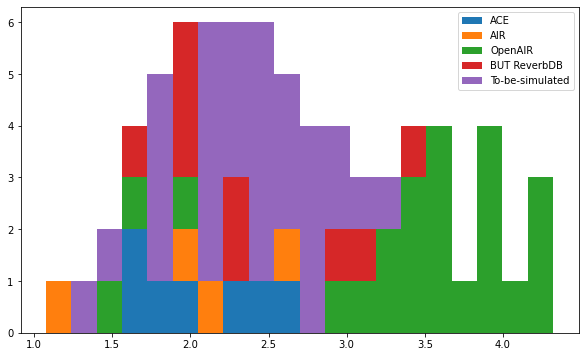

In [205]:
ace_vols = ace_df.drop_duplicates('room')['vol'].apply(np.log10)
air_vols = air_df.drop_duplicates('room')['vol'].apply(np.log10)
openair_vols = openair_df.drop_duplicates('room')['vol'].apply(np.log10)
but_vols = but_df.drop_duplicates('room')['vol'].apply(np.log10)

openair_lowvols = openair_vols[openair_vols<200]

add_vols = [1.3, 1.4, 1.76, 1.8, 1.82, 1.84,2.05, 2.1, 2.14, 2.19,2.2, 2.23,\
            2.3, 2.31, 2.39, 2.4, 2.43, 2.5, 2.53, 2.55, 2.6, 2.65, 2.7, 2.72,\
            2.75, 2.8, 2.87, 2.9, 3.1, 3.2]

#using this list to generate data


print(len(ace_vols) + len(air_vols) + len(openair_vols) + len(but_vols))
print(len(add_vols))


fig = plt.figure(figsize=(10,6))
plt.hist([ace_vols, air_vols, openair_lowvols, but_vols, add_vols], stacked=True,\
         label=['ACE','AIR', 'OpenAIR', 'BUT ReverbDB', 'To-be-simulated'],bins=20)
plt.legend()

In [223]:
pra_8df = pd.read_csv(os.path.join(RIR_PATH, 'pra','080322_pra_df.csv'))

In [224]:
rir_2_df = pd.concat([ace_df,air_df,openair_df, but_df, pra_8df]).reset_index()

<AxesSubplot:>

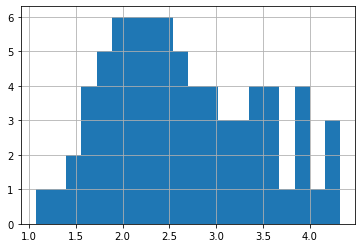

In [225]:
rir_2_df.drop_duplicates('room')['vol'].apply(np.log10).hist(bins=20)

In [226]:
rir_2_df.to_csv('/home/ci411/volume_estimation/0803_rir_df.csv', index=False)

In [2]:
import numpy as np

add_vols = [1.3, 1.4, 1.76, 1.8, 1.82, 1.84,2.05, 2.1, 2.14, 2.19,2.2, 2.23,\
            2.3, 2.31, 2.39, 2.4, 2.43, 2.5, 2.53, 2.55, 2.6, 2.65, 2.7, 2.72,\
            2.75, 2.8, 2.87, 2.9, 3.1, 3.2]

true_vols = [10**i for i in add_vols]

for vol in true_vols:
    print(vol)
print(true_vols)

19.952623149688797
25.118864315095795
57.543993733715695
63.09573444801933
66.06934480075961
69.18309709189366
112.2018454301963
125.89254117941675
138.03842646028852
154.88166189124811
158.48931924611142
169.82436524617444
199.52623149688787
204.17379446695296
245.4708915685031
251.18864315095797
269.1534803926917
316.22776601683796
338.84415613920237
354.8133892335753
398.1071705534973
446.683592150963
501.18723362727246
524.8074602497728
562.341325190349
630.957344480193
741.3102413009177
794.3282347242813
1258.9254117941675
1584.893192461114
[19.952623149688797, 25.118864315095795, 57.543993733715695, 63.09573444801933, 66.06934480075961, 69.18309709189366, 112.2018454301963, 125.89254117941675, 138.03842646028852, 154.88166189124811, 158.48931924611142, 169.82436524617444, 199.52623149688787, 204.17379446695296, 245.4708915685031, 251.18864315095797, 269.1534803926917, 316.22776601683796, 338.84415613920237, 354.8133892335753, 398.1071705534973, 446.683592150963, 501.1872336272724